## 範例重點

學會從 Keras 內建函式取得資料

能夠建立簡易的深度學習模型

觀察並了解 Overfit 現象

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    
    # input layer
    input_layer = keras.layers.Input([x_train.shape[-1]])
    # hidden layer
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    # output layer
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    # build model
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()

# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0720 13:21:52.694949 4641351104 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 13:21:52.822772 4641351104 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 13:21:52.883260 4641351104 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 13:21:53.021875 4641351104 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer i

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, 
          y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0720 13:22:14.254885 4641351104 deprecation.py:323] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0720 13:22:14.340049 4641351104 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 22s 430us/step - loss: 1.9106 - acc: 0.3164 - val_loss: 1.7658 - val_acc: 0.3651
Epoch 2/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.6959 - acc: 0.3960 - val_loss: 1.6374 - val_acc: 0.4230
Epoch 3/100
50000/50000 [==============================] - 8s 162us/step - loss: 1.6119 - acc: 0.4239 - val_loss: 1.6038 - val_acc: 0.4329
Epoch 4/100
50000/50000 [==============================] - 8s 159us/step - loss: 1.5500 - acc: 0.4480 - val_loss: 1.5469 - val_acc: 0.4441
Epoch 5/100
50000/50000 [==============================] - 10s 192us/step - loss: 1.4996 - acc: 0.4667 - val_loss: 1.4949 - val_acc: 0.4671
Epoch 6/100
50000/50000 [==============================] - 9s 175us/step - loss: 1.4574 - acc: 0.4828 - val_loss: 1.4472 - val_acc: 0.4835
Epoch 7/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.4248 - acc: 0.4928 - val_loss: 

50000/50000 [==============================] - 8s 158us/step - loss: 0.5201 - acc: 0.8133 - val_loss: 2.0188 - val_acc: 0.5243
Epoch 60/100
50000/50000 [==============================] - 8s 151us/step - loss: 0.5073 - acc: 0.8175 - val_loss: 2.1139 - val_acc: 0.5168
Epoch 61/100
50000/50000 [==============================] - 7s 144us/step - loss: 0.5061 - acc: 0.8174 - val_loss: 2.1001 - val_acc: 0.5184
Epoch 62/100
50000/50000 [==============================] - 7s 144us/step - loss: 0.4910 - acc: 0.8240 - val_loss: 2.1843 - val_acc: 0.5161
Epoch 63/100
50000/50000 [==============================] - 9s 174us/step - loss: 0.4872 - acc: 0.8254 - val_loss: 2.1073 - val_acc: 0.5168
Epoch 64/100
50000/50000 [==============================] - 8s 155us/step - loss: 0.4705 - acc: 0.8320 - val_loss: 2.2662 - val_acc: 0.5043
Epoch 65/100
50000/50000 [==============================] - 7s 144us/step - loss: 0.4627 - acc: 0.8328 - val_loss: 2.2181 - val_acc: 0.5156
Epoch 66/100
50000/50000 [=======

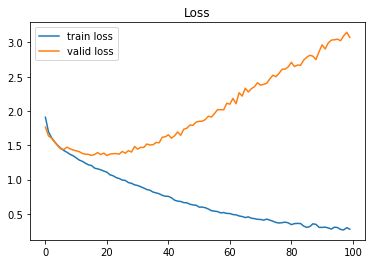

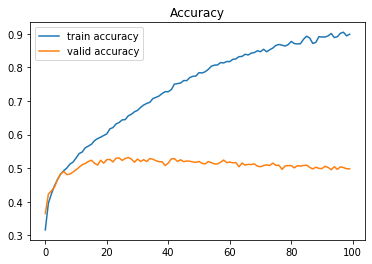

In [8]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業

請將 Epoch 加到 500 個，並觀察 learning curve 的走勢

請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [16]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [10]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [11]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [12]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    """
    Code Here : 建立你的神經網路
    """
    
    # input layer
    input_layer = keras.layers.Input([x_train.shape[-1]])
    # hidden layer
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    # output layer
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    # build model
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [13]:
# 用 Keras 內建方法檢視模型各層參數量
model.summary()
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False) # 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [14]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          
          epochs = 500, # 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
          
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 12s 231us/step - loss: 2.0724 - acc: 0.2655 - val_loss: 1.9513 - val_acc: 0.2918
Epoch 2/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.8708 - acc: 0.3415 - val_loss: 1.9908 - val_acc: 0.2662
Epoch 3/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.8030 - acc: 0.3631 - val_loss: 1.8158 - val_acc: 0.3666
Epoch 4/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.7569 - acc: 0.3810 - val_loss: 1.7536 - val_acc: 0.3823
Epoch 5/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.7216 - acc: 0.3941 - val_loss: 1.6871 - val_acc: 0.4090
Epoch 6/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.6892 - acc: 0.4069 - val_loss: 1.6897 - val_acc: 0.4057
Epoch 7/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.6667 - acc: 0.4146 - val_loss: 1

50000/50000 [==============================] - 6s 126us/step - loss: 1.1630 - acc: 0.5921 - val_loss: 1.3882 - val_acc: 0.5125
Epoch 60/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.1631 - acc: 0.5912 - val_loss: 1.4417 - val_acc: 0.4821
Epoch 61/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.1539 - acc: 0.5954 - val_loss: 1.6754 - val_acc: 0.4351
Epoch 62/500
50000/50000 [==============================] - 7s 150us/step - loss: 1.1539 - acc: 0.5952 - val_loss: 1.5648 - val_acc: 0.4588
Epoch 63/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.1436 - acc: 0.6001 - val_loss: 1.3191 - val_acc: 0.5291
Epoch 64/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.1367 - acc: 0.6005 - val_loss: 1.3757 - val_acc: 0.5082
Epoch 65/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.1373 - acc: 0.6003 - val_loss: 1.3809 - val_acc: 0.5164
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 6s 112us/step - loss: 0.8485 - acc: 0.7083 - val_loss: 1.5914 - val_acc: 0.4919
Epoch 118/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.8407 - acc: 0.7100 - val_loss: 1.3737 - val_acc: 0.5369
Epoch 119/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.8340 - acc: 0.7117 - val_loss: 1.4028 - val_acc: 0.5289
Epoch 120/500
50000/50000 [==============================] - 15s 291us/step - loss: 0.8369 - acc: 0.7107 - val_loss: 1.4664 - val_acc: 0.5077
Epoch 121/500
50000/50000 [==============================] - 16s 326us/step - loss: 0.8303 - acc: 0.7127 - val_loss: 1.5071 - val_acc: 0.5022
Epoch 122/500
50000/50000 [==============================] - 12s 242us/step - loss: 0.8210 - acc: 0.7153 - val_loss: 1.4908 - val_acc: 0.5116
Epoch 123/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.8170 - acc: 0.7175 - val_loss: 1.4119 - val_acc: 0.5340
Epoch 124/500
50000/5000

50000/50000 [==============================] - 6s 117us/step - loss: 0.5483 - acc: 0.8144 - val_loss: 1.6193 - val_acc: 0.5293
Epoch 176/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.5423 - acc: 0.8168 - val_loss: 2.0441 - val_acc: 0.4644
Epoch 177/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.5538 - acc: 0.8142 - val_loss: 1.8855 - val_acc: 0.4999
Epoch 178/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.5430 - acc: 0.8158 - val_loss: 1.7495 - val_acc: 0.5137
Epoch 179/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.5338 - acc: 0.8195 - val_loss: 1.5829 - val_acc: 0.5311
Epoch 180/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.5264 - acc: 0.8238 - val_loss: 1.5815 - val_acc: 0.5376
Epoch 181/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.5268 - acc: 0.8219 - val_loss: 2.1723 - val_acc: 0.4616
Epoch 182/500
50000/50000 [=

50000/50000 [==============================] - 7s 141us/step - loss: 0.3128 - acc: 0.9028 - val_loss: 2.1447 - val_acc: 0.5013
Epoch 234/500
50000/50000 [==============================] - 7s 150us/step - loss: 0.2982 - acc: 0.9127 - val_loss: 1.9932 - val_acc: 0.5220
Epoch 235/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.3222 - acc: 0.8996 - val_loss: 1.9674 - val_acc: 0.5192
Epoch 236/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.3416 - acc: 0.8948 - val_loss: 2.7612 - val_acc: 0.4620
Epoch 237/500
50000/50000 [==============================] - 8s 153us/step - loss: 0.2961 - acc: 0.9094 - val_loss: 2.0757 - val_acc: 0.5271
Epoch 238/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.2658 - acc: 0.9209 - val_loss: 2.0569 - val_acc: 0.5135
Epoch 239/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.2808 - acc: 0.9158 - val_loss: 1.9380 - val_acc: 0.5199
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 7s 137us/step - loss: 0.1221 - acc: 0.9727 - val_loss: 2.2735 - val_acc: 0.5309
Epoch 292/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.2059 - acc: 0.9467 - val_loss: 2.2179 - val_acc: 0.5371
Epoch 293/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.0903 - acc: 0.9827 - val_loss: 2.3903 - val_acc: 0.5235
Epoch 294/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.3004 - acc: 0.9258 - val_loss: 2.2269 - val_acc: 0.5291
Epoch 295/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.2001 - acc: 0.9501 - val_loss: 2.2552 - val_acc: 0.5347
Epoch 296/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.0945 - acc: 0.9813 - val_loss: 2.2364 - val_acc: 0.5402
Epoch 297/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.0867 - acc: 0.9834 - val_loss: 2.2735 - val_acc: 0.5383
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 6s 126us/step - loss: 0.0343 - acc: 0.9970 - val_loss: 2.5994 - val_acc: 0.5382
Epoch 350/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0342 - acc: 0.9969 - val_loss: 2.6201 - val_acc: 0.5311
Epoch 351/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.0332 - acc: 0.9972 - val_loss: 2.6359 - val_acc: 0.5295
Epoch 352/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.0322 - acc: 0.9970 - val_loss: 2.6168 - val_acc: 0.5360
Epoch 353/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.0315 - acc: 0.9976 - val_loss: 2.6511 - val_acc: 0.5334
Epoch 354/500
50000/50000 [==============================] - 8s 153us/step - loss: 0.0303 - acc: 0.9977 - val_loss: 2.6738 - val_acc: 0.5349
Epoch 355/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0290 - acc: 0.9981 - val_loss: 2.6655 - val_acc: 0.5315
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 8s 166us/step - loss: 0.1971 - acc: 0.9501 - val_loss: 2.6673 - val_acc: 0.5354
Epoch 408/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.0315 - acc: 0.9978 - val_loss: 2.7810 - val_acc: 0.5371
Epoch 409/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0256 - acc: 0.9988 - val_loss: 2.7635 - val_acc: 0.5336
Epoch 410/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.0233 - acc: 0.9989 - val_loss: 2.7788 - val_acc: 0.5354
Epoch 411/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0219 - acc: 0.9991 - val_loss: 2.7660 - val_acc: 0.5378
Epoch 412/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.0202 - acc: 0.9993 - val_loss: 2.8243 - val_acc: 0.5370
Epoch 413/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.0195 - acc: 0.9994 - val_loss: 2.7913 - val_acc: 0.5393
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 7s 130us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 3.0576 - val_acc: 0.5354
Epoch 466/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 3.0679 - val_acc: 0.5373
Epoch 467/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 3.0722 - val_acc: 0.5385
Epoch 468/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 3.1149 - val_acc: 0.5354
Epoch 469/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 3.0746 - val_acc: 0.5360
Epoch 470/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0072 - acc: 0.9999 - val_loss: 3.0795 - val_acc: 0.5367
Epoch 471/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 3.0863 - val_acc: 0.5385
Epoch 472/500
50000/50000 [

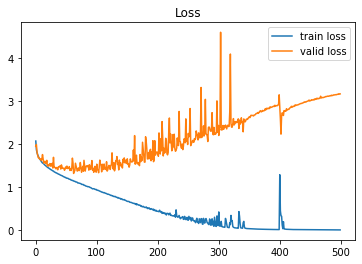

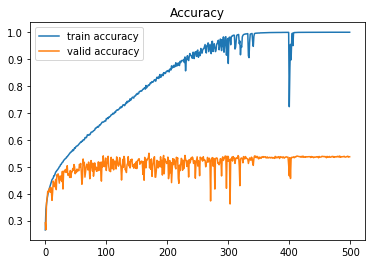

In [15]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 參考資料


EliteDataScience - <font color="red">如何減少 Overfitting 的發生</font>


> ## 1. <font color="red">使用 K-fold cross validation</font>

        找到一組參數可以在多組不同的 validation 上得到相似的結果

> ## 2. <font color="red">使用更多的訓練資料</font>

> ## 3. <font color="red">減少 Features (參數) 的使用量</font>

        避免參數比潛在組合更多的狀況發生，以免模型靠硬記就可以得到結果

> ## 4. <font color="red">在模型訓練的過程中加入正則化參數 (Regularization)</font>

        控制 input 的改變對模型造成的影響太大。
        
        
![img1](https://ai100-fileentity.cupoy.com/2nd/homework/D77/1562834179002/large)



## [Overfitting – Coursera 日誌](https://medium.com/@ken90242/machine-learning%E5%AD%B8%E7%BF%92%E6%97%A5%E8%A8%98-coursera%E7%AF%87-week-3-4-the-c05b8ba3b36f)


## What is “overfitting” ?

(1) Overfitting的意思就是太過追求參數完美預測出訓練數據的結果，反而導致實際預測效果不佳

> ## <font color="red">high variance可以理解為其有著過多的 variable</font>
> ![img2](https://miro.medium.com/max/704/1*2J4X673RGHSwkUo04xdoFw.png)


(2) 跟overfit相反的狀況：underfit，代表在訓練數據中也有著高預測誤差的問題

> ## <font color="red">high bias可以理解為其會過度依賴其截距(θ0)</font>
> ![img3](https://miro.medium.com/max/584/1*HzNe5B2wm7RtrNYpOEBjMw.png)

--

## 那我們要怎麼解決Overfitting的問題呢？

有幾種做法：

1. 降低features的數量：人工選擇、model selection algorithm

2. Regularization：維持現有的features，但是降低部分不重要feature的影響力。這對於有著許多feature的hypothesis很有幫助

--

## 2. Cost Function

下面的例子：左方為適當的模型，右方為Overfitting

> ![img4](https://miro.medium.com/max/1396/1*ca3r2frg--jgL2U3A9f1Eg.png)

我們可以發現主要的問題是在加了θ3跟θ4之後出現了overfitting的問題
那假設我們將θ3跟θ4的影響降到最低呢(讓其逼近於0)？

> ![img5](https://miro.medium.com/max/1400/1*5aO_R8Lg9QXHaakLMgHIKg.png)

<font color="red">就像是我們改寫 $ J(θ)，多加上1000*(θ3²)和1000*(θ4²) $</font>

上述的1000可以隨時替換成一個極大的數值。

(這個 λ 其實跟上面例子的數字1000是一樣的意思，它正式的名稱是 <font color="red"> regularization parameter </font> )

<font color="red">而模型自然會為了將J(θ)降到最低，而使θ3跟θ4降至最低，形成下面的粉紅色線構成的模型</font>

> ![img6](https://miro.medium.com/max/820/1*yfvqviVHVAkXYiJfBg_40w.png)

--


## 可能會有人好奇 λ 到底代表什麼意思？

<font color="red">λ代表的其實是我們對於預測誤差跟正規項的取捨</font>

> 當今天 λ越大，模型會比較不重視預測落差反而是極力地想要壓低所有θ值的大小
就像是我們如果把 λ 設成10¹⁰的話，所有θ值都會趨近於0，最後形成一條直線的hypothesis
> ![img7](https://miro.medium.com/max/740/1*6TaOolLvrclx8e0gjntXoQ.png)

而若是 λ 越小甚至趨近於0，可能對改善overfitting就沒什麼太大的幫助了

我在學習正規化的時候，對於為什麼只是加上個正規多項式就可以改善overfitting感到非常疑惑

畢竟我們根本不知道要降低哪一個 θ值(feature)的影響力啊

就這樣直接一視同仁的一起打壓所有的θ值到底為什麼會有效？

    這是我想到的答案(沒有證實過)：的確是一視同仁的打壓所有的 θ值，但是若是今天θ值只要設定到某幾個數字的話可以使預測誤差降到非常低的話，那麼模型如果為了貪小便宜的將那幾個 θ值給壓低反而造成了預測誤差的大幅上升，使得J(θ)不降反升的反效果的話，會非常得不償失，因此模型將會斟酌不要降低那些重要的 θ值

上述的假設都建立在今天 λ 設立得宜的情況以及有足夠的資料來support預測落差的下降，說服模型不要把重要的 θ值降低

## [EliteDataScience – Overfitting](https://elitedatascience.com/overfitting-in-machine-learning)


## Signal vs. Noise

You may have heard of the famous book The Signal and the Noise by Nate Silver.

In predictive modeling, you can think of <font color="red">the “signal” as the true underlying pattern that you wish to learn from the data.</font>

<font color="red">“Noise,” on the other hand, refers to the irrelevant information or randomness in a dataset.</font>


## Noise interferes with signal.

Here’s where machine learning comes in. <font color="red">A well functioning ML algorithm will separate the signal from the noise.</font>

--


## Overfitting vs. Underfitting

We can understand overfitting better by looking at the opposite problem, underfitting.

Underfitting occurs when a model is too simple – informed by too few features or regularized too much – which makes it inflexible in learning from the dataset.

Simple learners tend to have less variance in their predictions but more bias towards wrong outcomes (see: [The Bias-Variance Tradeoff](http://elitedatascience.com/bias-variance-tradeoff)).

![img8](https://elitedatascience.com/wp-content/uploads/2017/06/Bias-vs.-Variance-v5.png)


On the other hand, complex learners tend to have more variance in their predictions.

### Both bias and variance are forms of prediction error in machine learning.

--

## How to Detect Overfitting

1. If our model does much better on the training set than on the test set, then we’re likely overfitting.

2. Another tip is to start with a very simple model to serve as a benchmark.

--

## How to Prevent Overfitting

## 1. Cross-validation

> The idea is clever: Use your initial training data to generate multiple mini train-test splits. Use these splits to tune your model.

In standard k-fold cross-validation, we partition the data into k subsets, called folds. Then, we iteratively train the algorithm on k-1 folds while using the remaining fold as the test set (called the “holdout fold”).

> ![img20](https://elitedatascience.com/wp-content/uploads/2017/06/Cross-Validation-Diagram.jpg)
> K-Fold Cross-Validation


Cross-validation allows you to tune hyperparameters with only your original training set. This allows you to keep your test set as a truly unseen dataset for selecting your final model.

We have another article with a [more detailed breakdown of cross-validation](https://elitedatascience.com/machine-learning-iteration#micro)

### 2. Train with more data


### 3. Remove features


## 4. <font color="red">Early stopping</font>

When you’re [training a learning algorithm iteratively](https://elitedatascience.com/machine-learning-iteration#model), you can measure how well each iteration of the model performs.

Up until a certain number of iterations, new iterations improve the model. After that point, however, the model’s ability to generalize can weaken as it begins to overfit the training data.

<font color="red">Early stopping refers stopping the training process before the learner passes that point.</font>

> Early stopping graphic
> ![img21](https://elitedatascience.com/wp-content/uploads/2017/09/early-stopping-graphic.jpg)
> Today, this technique is mostly used in deep learning while other techniques (e.g. regularization) are preferred for classical machine learning.

### 5. Regularization


### 6. Ensembling

    Ensembles are machine learning methods for combining predictions from multiple separate models. There are a few different methods for ensembling, but the two most common are:

> <font color="red">Bagging attempts to reduce the chance overfitting complex models.</font>

    It trains a large number of "strong" learners in parallel.
    A strong learner is a model that's relatively unconstrained.
    Bagging then combines all the strong learners together in order to "smooth out" their predictions.
    
> <font color="red">Boosting attempts to improve the predictive flexibility of simple models.</font>

    It trains a large number of "weak" learners in sequence.
    A weak learner is a constrained model (i.e. you could limit the max depth of each decision tree).
    Each one in the sequence focuses on learning from the mistakes of the one before it.
    Boosting then combines all the weak learners into a single strong learner.
    While bagging and boosting are both ensemble methods, they approach the problem from opposite directions.

    Bagging uses complex base models and tries to "smooth out" their predictions, while boosting uses simple base models and tries to "boost" their aggregate complexity.
    
    
--

So here are some additional resources to help you get started:

[Python machine learning tutorial](http://elitedatascience.com/python-machine-learning-tutorial-scikit-learn)

[Plotting overfitting and underfitting with Scikit-Learn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)

[More real-world examples of overfitting](https://stats.stackexchange.com/questions/128616/whats-a-real-world-example-of-overfitting/128625#128625)

## [The Bias-Variance Tradeoff](http://elitedatascience.com/bias-variance-tradeoff)

There are 3 types of prediction error: <font color="red">bias</font>, <font color="red">variance</font>, and <font color="dodgerblue">irreducible error (noise)</font>.

Irreducible error is also known as "noise," and it can't be reduced by your choice in algorithm. It typically comes from inherent randomness, a mis-framed problem, or an incomplete feature set.

The other two types of errors, however, can be reduced because they stem from your algorithm choice.

![img9](https://elitedatascience.com/wp-content/uploads/2017/06/Bias-vs.-Variance-v5-2-darts.png)

![img10](https://elitedatascience.com/wp-content/uploads/2017/06/Bias-vs.-Variance-v4-chart.png)

--

## <font color="red">Error from Bias</font>

> ### <font color="red">Bias is the difference between your model's expected predictions and the true values</font>.

That might sound strange because shouldn't you "expect" your predictions to be close to the true values? Well, it's not always that easy because some algorithms are simply too rigid to learn complex signals from the dataset.

Imagine fitting a linear regression to a dataset that has a non-linear pattern:

>![img11](https://elitedatascience.com/wp-content/uploads/2017/05/noisy-sine-linear.png)
> ## No matter how many more observations you collect, a linear regression <font color="red">won't be able to model the curves in that data!</font> This is known as <font color="red">under-fitting</font>.

--

## <font color="red">Error from Variance</font>

> ### <font color="red">Variance refers to your algorithm's sensitivity to specific sets of training data.</font>.

High variance algorithms will produce drastically different models depending on the training set.

For example, imagine an algorithm that fits a completely unconstrained, super-flexible model to the same dataset from above:

>![img12](https://elitedatascience.com/wp-content/uploads/2017/02/noisy-sine-decision-tree.png)
> ## As you can see, <font color="red">this unconstrained model has basically memorized the training set, including all of the noise</font>. This is known as <font color="red">over-fitting</font>.


--

## The Bias-Variance Tradeoff

1. Low variance (high bias) algorithms tend to be **less complex**, with simple or rigid underlying structure.

> <font color="dodgerblue">太過簡單的模型：Low variance (high bias) - Under Fitting</font>

> <font color="dodgerblue">代表：regression, naive Bayes</font>

- <font color="dodgerblue">They train models that are consistent, but inaccurate on average.</font>
- <font color="dodgerblue">These include linear or parametric algorithms such as regression and naive Bayes.</font>


--


2. On the other hand, low bias (high variance) algorithms tend to be **more complex**, with flexible underlying structure.

> <font color="red">分枝太過複雜的模型會變成死背訓練資料：High variance (Low bias) - Over Fitting</font>

> <font color="red">代表：decision trees, KNN</font>

- <font color="red">They train models that are accurate on average, but inconsistent.</font>
- <font color="red">These include non-linear or non-parametric algorithms such as decision trees and nearest neighbors.</font>


This tradeoff in complexity is why there's a tradeoff in bias and variance - an algorithm cannot simultaneously be more complex and less complex.

*Note: For certain problems, it's possible for some algorithms to have less of both errors than others. For example, ensemble methods (i.e. Random Forests) often perform better than other algorithms in practice. Our recommendation is to always try multiple reasonable algorithms for each problem.


## Total Error

To build a good predictive model, you'll need to find a balance between bias and variance that minimizes the total error.

## <font color = "red">$ Total  Error = Bias^2 + Variance + Irreducible Error (Noise) $</font>

## [Overfitting vs. Underfitting](https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765)


![img30](https://miro.medium.com/max/2000/1*vhuuTIB0tl1Ka39itIIoHQ.png)


### Overfitting vs. Underfitting

![img31-1](https://miro.medium.com/max/1000/1*kZfqaD6hl9iYGYXkMwV-JA.png)
![img31-2](https://miro.medium.com/max/1000/1*2RXJ2O-_c2ukaq5p-WQ9tQ.png)

--

![img32-1](https://miro.medium.com/max/1000/1*Di7rY6ALXtkhlmlcKRSCoA.png)
![img32-2](https://miro.medium.com/max/1000/1*QzA45ATjeEbwv5f1G99GnQ.png)


###  Validation

![img33](https://miro.medium.com/max/1400/1*0G9CzbPadQaCXkxrTkqN7A.png)

--

![img34-1](https://miro.medium.com/max/1000/1*PL88RSFfQp0p9yBwC-o7Jg.png)
![img34-2](https://miro.medium.com/max/1000/1*pOkhETBM6is2t7JpnkOpTQ.png)

--

###  <font color="red">A model that is underfit will have high training and high testing error while an overfit model will have extremely low training error but a high testing error.</font>

![img35](https://miro.medium.com/max/1140/1*72c0UVyvEbxLNB1J43id5Q.png)

